## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3         X4         Y
0  95.617149  473.957304  0.134254   3.993014  0.597806
1  16.119671  443.046559  0.604271   5.049276  1.538657
2   9.783087  408.062431  0.688809   1.605309  1.629516
3  55.045050  952.060959  0.180172  10.755663  1.392033
4  70.119587  467.641218  0.857357   8.902377  1.565547


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0266573	total: 68.7ms	remaining: 1m 8s
1:	learn: 1.0171730	total: 69.2ms	remaining: 34.5s
2:	learn: 1.0080016	total: 69.7ms	remaining: 23.2s
3:	learn: 0.9980290	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9891700	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9808045	total: 71.4ms	remaining: 11.8s
6:	learn: 0.9718781	total: 71.8ms	remaining: 10.2s
7:	learn: 0.9620707	total: 72.3ms	remaining: 8.96s
8:	learn: 0.9545372	total: 72.8ms	remaining: 8.01s
9:	learn: 0.9448666	total: 73.5ms	remaining: 7.27s
10:	learn: 0.9353136	total: 73.9ms	remaining: 6.64s
11:	learn: 0.9258837	total: 74.5ms	remaining: 6.13s
12:	learn: 0.9168790	total: 74.9ms	remaining: 5.69s
13:	learn: 0.9093682	total: 75.5ms	remaining: 5.31s
14:	learn: 0.8994255	total: 75.9ms	remaining: 4.98s
15:	learn: 0.8904104	total: 76.3ms	remaining: 4.69s
16:	learn: 0.8828110	total: 76.7ms	remaining: 4.43s
17:	learn: 0.8751624	total: 77.1ms	remaining: 4.21s
18:	learn: 0.8655558	total: 77.5ms	remaining

116:	learn: 0.3906214	total: 119ms	remaining: 899ms
117:	learn: 0.3885799	total: 120ms	remaining: 895ms
118:	learn: 0.3851289	total: 120ms	remaining: 889ms
119:	learn: 0.3827964	total: 121ms	remaining: 884ms
120:	learn: 0.3802055	total: 121ms	remaining: 879ms
121:	learn: 0.3774413	total: 121ms	remaining: 874ms
122:	learn: 0.3751147	total: 122ms	remaining: 869ms
123:	learn: 0.3725099	total: 122ms	remaining: 863ms
124:	learn: 0.3698011	total: 123ms	remaining: 858ms
125:	learn: 0.3673091	total: 123ms	remaining: 853ms
126:	learn: 0.3647691	total: 123ms	remaining: 848ms
127:	learn: 0.3623453	total: 124ms	remaining: 843ms
128:	learn: 0.3600229	total: 124ms	remaining: 838ms
129:	learn: 0.3575694	total: 125ms	remaining: 834ms
130:	learn: 0.3551767	total: 125ms	remaining: 830ms
131:	learn: 0.3527394	total: 125ms	remaining: 825ms
132:	learn: 0.3504953	total: 126ms	remaining: 820ms
133:	learn: 0.3485660	total: 126ms	remaining: 816ms
134:	learn: 0.3468319	total: 127ms	remaining: 811ms
135:	learn: 

273:	learn: 0.1773127	total: 186ms	remaining: 492ms
274:	learn: 0.1765052	total: 186ms	remaining: 491ms
275:	learn: 0.1756635	total: 187ms	remaining: 490ms
276:	learn: 0.1751435	total: 187ms	remaining: 489ms
277:	learn: 0.1743525	total: 188ms	remaining: 487ms
278:	learn: 0.1734909	total: 188ms	remaining: 486ms
279:	learn: 0.1728317	total: 189ms	remaining: 485ms
280:	learn: 0.1722340	total: 189ms	remaining: 483ms
281:	learn: 0.1715755	total: 189ms	remaining: 482ms
282:	learn: 0.1710009	total: 190ms	remaining: 481ms
283:	learn: 0.1704938	total: 190ms	remaining: 480ms
284:	learn: 0.1697343	total: 191ms	remaining: 479ms
285:	learn: 0.1693142	total: 191ms	remaining: 477ms
286:	learn: 0.1687919	total: 192ms	remaining: 476ms
287:	learn: 0.1683279	total: 192ms	remaining: 475ms
288:	learn: 0.1677459	total: 193ms	remaining: 474ms
289:	learn: 0.1673437	total: 193ms	remaining: 473ms
290:	learn: 0.1668076	total: 194ms	remaining: 472ms
291:	learn: 0.1663721	total: 194ms	remaining: 470ms
292:	learn: 

535:	learn: 0.0921822	total: 300ms	remaining: 259ms
536:	learn: 0.0921025	total: 300ms	remaining: 259ms
537:	learn: 0.0920607	total: 301ms	remaining: 258ms
538:	learn: 0.0917034	total: 301ms	remaining: 258ms
539:	learn: 0.0913793	total: 301ms	remaining: 257ms
540:	learn: 0.0912589	total: 302ms	remaining: 256ms
541:	learn: 0.0911816	total: 302ms	remaining: 256ms
542:	learn: 0.0907938	total: 303ms	remaining: 255ms
543:	learn: 0.0904102	total: 303ms	remaining: 254ms
544:	learn: 0.0900934	total: 304ms	remaining: 254ms
545:	learn: 0.0898023	total: 304ms	remaining: 253ms
546:	learn: 0.0895155	total: 305ms	remaining: 252ms
547:	learn: 0.0891771	total: 305ms	remaining: 252ms
548:	learn: 0.0890462	total: 305ms	remaining: 251ms
549:	learn: 0.0887158	total: 306ms	remaining: 250ms
550:	learn: 0.0886014	total: 306ms	remaining: 250ms
551:	learn: 0.0882952	total: 307ms	remaining: 249ms
552:	learn: 0.0881684	total: 307ms	remaining: 248ms
553:	learn: 0.0878090	total: 308ms	remaining: 248ms
554:	learn: 

690:	learn: 0.0587144	total: 367ms	remaining: 164ms
691:	learn: 0.0585261	total: 368ms	remaining: 164ms
692:	learn: 0.0583399	total: 368ms	remaining: 163ms
693:	learn: 0.0581558	total: 368ms	remaining: 162ms
694:	learn: 0.0580106	total: 369ms	remaining: 162ms
695:	learn: 0.0578676	total: 369ms	remaining: 161ms
696:	learn: 0.0576968	total: 370ms	remaining: 161ms
697:	learn: 0.0575245	total: 370ms	remaining: 160ms
698:	learn: 0.0573447	total: 371ms	remaining: 160ms
699:	learn: 0.0572086	total: 371ms	remaining: 159ms
700:	learn: 0.0570426	total: 371ms	remaining: 158ms
701:	learn: 0.0568567	total: 372ms	remaining: 158ms
702:	learn: 0.0567036	total: 372ms	remaining: 157ms
703:	learn: 0.0566255	total: 373ms	remaining: 157ms
704:	learn: 0.0564542	total: 373ms	remaining: 156ms
705:	learn: 0.0562292	total: 374ms	remaining: 156ms
706:	learn: 0.0561017	total: 374ms	remaining: 155ms
707:	learn: 0.0560260	total: 375ms	remaining: 155ms
708:	learn: 0.0557877	total: 375ms	remaining: 154ms
709:	learn: 

953:	learn: 0.0300690	total: 482ms	remaining: 23.2ms
954:	learn: 0.0299687	total: 482ms	remaining: 22.7ms
955:	learn: 0.0299062	total: 482ms	remaining: 22.2ms
956:	learn: 0.0298449	total: 483ms	remaining: 21.7ms
957:	learn: 0.0297615	total: 483ms	remaining: 21.2ms
958:	learn: 0.0296637	total: 484ms	remaining: 20.7ms
959:	learn: 0.0295937	total: 484ms	remaining: 20.2ms
960:	learn: 0.0295101	total: 485ms	remaining: 19.7ms
961:	learn: 0.0294285	total: 485ms	remaining: 19.2ms
962:	learn: 0.0293487	total: 486ms	remaining: 18.7ms
963:	learn: 0.0292342	total: 486ms	remaining: 18.1ms
964:	learn: 0.0291578	total: 486ms	remaining: 17.6ms
965:	learn: 0.0290812	total: 487ms	remaining: 17.1ms
966:	learn: 0.0289670	total: 487ms	remaining: 16.6ms
967:	learn: 0.0289077	total: 487ms	remaining: 16.1ms
968:	learn: 0.0288400	total: 488ms	remaining: 15.6ms
969:	learn: 0.0287735	total: 488ms	remaining: 15.1ms
970:	learn: 0.0286815	total: 489ms	remaining: 14.6ms
971:	learn: 0.0285830	total: 489ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


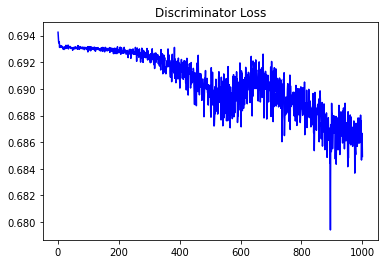

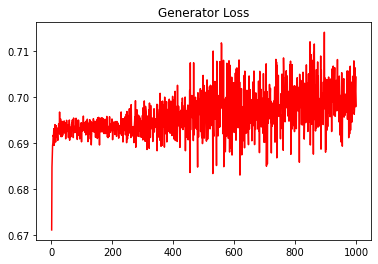

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21378777266810828


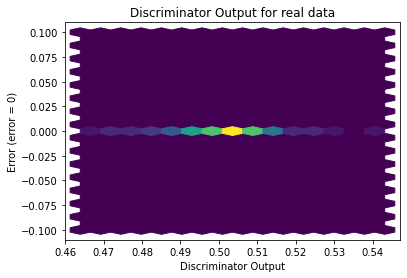

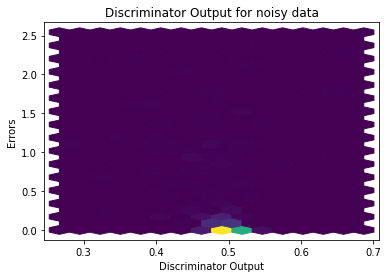

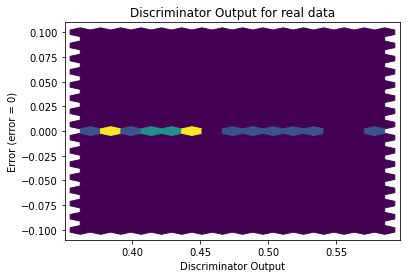

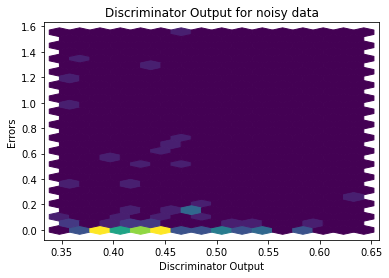

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0831]], requires_grad=True)
